# Model Selection, Overfitting and Regulzarization

This tutorial is meant to be a gentle introduction to machine learning concepts. We present a simple polynomial fitting example using a least squares solution, which is a specific case of what is called maximum likelihood, but we will not get into details about this probabilistic view of least squares in this tutorial. We use this example to introduce important machine learning concepts using plain language that should be accessible to undergradiuate and graduate students with a minimum background of calculus.

The goals of this tutorial are:
  - Explain how to develop an experiment. Split your data into development set (*i.e.*, train and validaion sets) and test set.   
  - Introduce how to select your model.
  - Introduce the concepts of *over-fitting*, *under-fitting*, and *model generalization*.
  - Introduce the concept of *regularization* for reducing *over-fitting*.
 

This tutorial is interactive and it corresponds to an adaptation of the example presented in chapter 1 of the book: **Christopher M. Bishop. 2006. Pattern Recognition and Machine Learning (Information Science and Statistics). Springer-Verlag New York, Inc., Secaucus, NJ, USA.**

## Designing your experiment

Machine learning builds models by learning from data. When designing your experiment, you need to split your data into a development set and a test set. The development set is split into 2 sets: a train set and a validation set. The train set is used to learn the parameters of the different models you are fititng (training). The validation set is employed to select hopefully what is the best model among the different models you trained, therefore it has a bias and cannot be used as proof of generalization. The test set is used to see if the selected model generalizes well to unseen data. 

<img src="../Figures/train_val_test.png" alt="Drawing" style="width: 500px;"/>

## Generating synthetic data

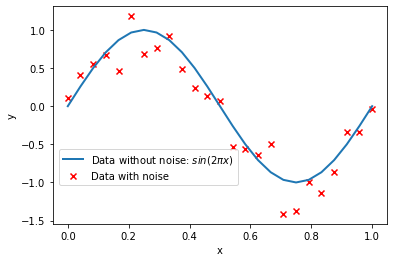

In [1]:
# Directive to make plots inline as opposed to having pop-up plots 
%matplotlib inline 
import numpy as np # Import numpy with nickname np
import matplotlib.pylab as plt # plotting library
from ipywidgets import * # Interaction library

var = 0.2 #Noise variance

#Create data set
N = 25
x = np.linspace(0, 1, N) 
y_noiseless = np.sin(2*np.pi*x) # signal
y = y_noiseless + np.random.normal(0, var, N) #signal + noise -> real measurements always come with noise


# Plot entire data set with and without noise
plt.figure()
plt.plot(x,y_noiseless,linewidth = 2.0,label = r'Data without noise: $sin(2 \pi x)$')
plt.scatter(x,y,color ='red', marker = 'x', label = r'Data with noise')
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Splitting the data into train, validation, and test sets

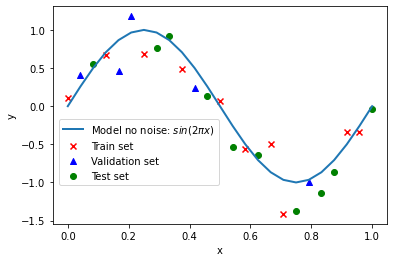

In [2]:
# Splitting the data in train/validation/test sets - size of each set was choosen arbitrarily
train_size = 10
val_size = 5
test_size = 10

indexes = np.arange(N, dtype =int)
np.random.seed(seed = 2) # Random seed to keep results always the same
np.random.shuffle(indexes) # Shuffling the data before the split

# Train set
aux = indexes[:train_size]
aux = np.sort(aux)
x_train = x[aux]
y_train = y[aux] 

#Validation set
aux = indexes[train_size: train_size + val_size]
aux = np.sort(aux)
x_val= x[aux]
y_val = y[aux]

# Test set
aux = indexes[-test_size:]
aux = np.sort(aux)
x_test = x[aux]
y_test = y[aux]

# Plot train/val/test sets
plt.figure()
plt.plot(x,y_noiseless,linewidth = 2.0,label = r'Model no noise: $sin(2 \pi x)$')
plt.scatter(x_train,y_train,color ='red', marker = 'x', label = "Train set")
plt.scatter(x_val,y_val,color = 'blue',marker = '^' , label = "Validation set")
plt.scatter(x_test,y_test,color = 'green', marker = 'o', label = "Test set")
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Data

Observations: $$\boldsymbol{X} =[x_1,x_2,...,x_N]^T$$
Target:  $$\boldsymbol{T} =[t_1,t_2,...,t_N]^T$$
Estimates:  $$\boldsymbol{Y} =[y_1,y_2,...,y_N]^T$$


## Polynomial Model

$$y(x,\boldsymbol{W})= w_0 + w_1x +w_2x^2+...+w_mx^m = \sum^M_{j=0}w_jx^j$$

Weights (*i.e.*, what our model learns):  $$\boldsymbol{W} =[t_1,t_2,...,t_M]^T$$

## Cost Function

Quadratic cost function: $$E(\boldsymbol{W})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{W})-t_n\}^2$$

Computing the derivative of the cost function and making it equal to zero, we can find the vector **W*** that minimizes the error:
$$ \boldsymbol{W}^* = (\boldsymbol{A}^T\boldsymbol{A})^{-1}\boldsymbol{A} ^T\boldsymbol{T}$$

Where **A** is defined by:

$$\boldsymbol{A} = \begin{bmatrix}
    1 & x_{1} & x_{1}^2 & \dots  & x_{1}^M \\
    1 & x_{2} & x_{2}^2 & \dots  & x_{2}^M \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{N} & x_{N}^2 & \dots  & x_{N}^M
\end{bmatrix}$$

In [3]:
#Least squares polynomial fitting solution
# Implementation of the equation shown above 
def polynomial_fit(X,T,M):
    A = np.power(X.reshape(-1,1),np.arange(0,M+1).reshape(1,-1))
    T = T.reshape(-1,1)
    W = np.dot(np.linalg.pinv(A),T)
    return W.ravel()

Plotting the least squares result varying the polynomial degree between  0 a 9. **Which model is a good model?** Look at the plots but also the magnitude of the weights resulting from each polynomial fit.

In [4]:
def plotmodel(M):
    coefs = polynomial_fit(x_train, y_train, M)[::-1]
    print("Weights:\n", coefs)
    p = np.poly1d(coefs)
    plt.figure()
    plt.plot(x,y_noiseless,linewidth = 1.5,label = r'Data no noise: $sin(2 \pi x)$')
    plt.scatter(x_train,y_train,color='red',label= "Train set")
    plt.xlabel("x")
    plt.ylabel(r'y')
    y_fit = p(x_train) 
    plt.plot(x_train,y_fit,linewidth = 1.0,label ="Polynomial Fit")
    plt.legend(loc=(0.02,0.02))
    plt.show()

interact(plotmodel,M=(0,9,1))  

interactive(children=(IntSlider(value=4, description='M', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.plotmodel(M)>

Depending on the degree, M, of the polynomial we fit to our data, our model falls under one of these categories:

- **Under-fitting**: the model is too inflexible and is not able to capture any patterns in the data.

- **Over-fitting**: the model is too flexible. It ends up tuning to the random noise in the data. The model may have a low error in the train set, but it is not expected to generalize well to new (unseen) data.

- **Good fit**: The model is able to capture patterns in our data, but it does not get tuned to the random noise in the data. Better chances to generalize to new  (unseen) data.

A good exercise is to visually determine whether the model is under-fitting, over-fitting or it is a good model based on the polynomial degree in the interactive plot shown above. 

## Root mean squared error and Model Selection

Root mean squared error is an error measure commonly emplyed in regression problems.

$$E_{RMS}=\sqrt{2E(\boldsymbol{W^*})/N}$$

We will analyze the root mean squared error in the validation set to select our model.

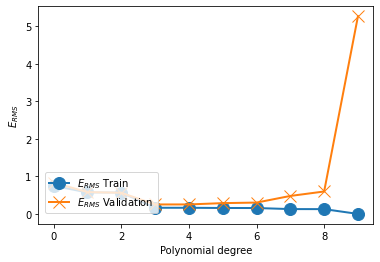

Model selected was a  polynomial of degree 3
Root mean squared test error: 0.277


In [7]:
# Computes RMS error
def rms_error(X,T,W):
    p = np.poly1d(W)
    T_fit = p(X)
    E = np.sqrt(((T - T_fit)**2/T.size).sum())
    return E
   
m = range(10)
train = []
val = []

# Compute RMS error across different polynomial fits
for M in m:
    W = polynomial_fit(x_train, y_train, M)[::-1]
    error_train = rms_error(x_train,y_train,W)
    error_val = rms_error(x_val,y_val,W)
    train.append(error_train)
    val.append(error_val)

# Plot the errors
plt.figure()
plt.plot(m,train,linewidth = 2.0,marker = 'o',markersize = 12,label = r'$E_{RMS}$ Train')
plt.plot(m,val,linewidth = 2.0,marker = 'x',markersize = 12,label = r'$E_{RMS}$ Validation')
plt.legend(loc = (0.02, 0.05))
plt.xlabel("Polynomial degree")
plt.ylabel(r'$E_{RMS}$')
plt.show()


# Model selection - the model with the lowest error in the validation set is selected. Then, the model 
# generalizability is assessed on the test set. 
best_M = np.argmin(val)
W = polynomial_fit(x_train, y_train, best_M)[::-1]
test_error = rms_error(x_test,y_test,W)
print("Model selected was a  polynomial of degree %d" %best_M)
print("Root mean squared test error: %.3f" %test_error)

## Cost function with regularization

Regularization is a technique to avoid overfitting. Do you remember how the values of the estimated weights increased quickly for polynomial fits with high degrees in the example without regularization? That was the model tuning itself to the noise in the data. Regularization consists in adding a penalty term to the cost function. Let's add a quadratic penalty to the weights we are trying to estimate. The quadratic penalty is called **L2 regularization**. 

$$E(\boldsymbol{W})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{W})-t_n\}^2 +\frac{\lambda}{2}||\boldsymbol{W}||^2$$

The above equation also has a well-defined minimum point. Computing its derivative and making it equal to zero, the solution of the equation is given by:

$$\boldsymbol{W}^* = (\boldsymbol{A}^T\boldsymbol{A} + \lambda n\boldsymbol{I})^{-1}\boldsymbol{A} ^T\boldsymbol{T} $$

Note that our problem now has two hyper-parameters that we need to set. The polynomial degree (M) and the regularization factor ($\lambda$). Hyper-parameters are set by the user (*e.g.*, M and $\lambda$, while parameters are learned by the model (*e.g.*, the weights).

In [8]:
#Least square solution with regularization
def polynomial_fit_reg(X,T,M,lamb):
    N = X.shape[0]
    A = np.power(X.reshape(-1,1),np.arange(0,M+1).reshape(1,-1))
    lambda_matrix = lamb*N*np.eye(M+1)
    T = T.reshape(-1,1)
    aux = np.dot(A.T,A) + lambda_matrix
    aux = np.linalg.pinv(aux)
    aux2 = np.dot(A.T,T)
    W = np.dot(aux,aux2)
    return W.ravel()

In the demo below, we show the influence of $log(\lambda)$ and $M$ in the polynomial fitting. Note the influence of $\lambda$  in the estimated weights. 

In [9]:
def plotmodel2(M,log_lamb):
    lamb = np.exp(log_lamb)
    coefs = polynomial_fit_reg(x_train, y_train, M,lamb)[::-1]
    print("Weights:\n",coefs)
    print("Lambda\n", lamb)
    p = np.poly1d(coefs)
    plt.figure()
    plt.plot(x,y_noiseless,linewidth = 1.5,label = r'Data no noise: $sin(2 \pi x)$')
    plt.scatter(x_train,y_train,color='red',label= "Train set")
    plt.xlabel("x")
    plt.ylabel(r'y')
    y_fit = p(x_train) 
    plt.plot(x_train,y_fit,linewidth = 1.0,label ="Polynomial Fit")
    plt.legend(loc=(0.02,0.02))
    plt.show()
interact(plotmodel2,M=(0,9,1),log_lamb = (-40,-9,.1))  

interactive(children=(IntSlider(value=4, description='M', max=9), FloatSlider(value=-25.0, description='log_la…

<function __main__.plotmodel2(M, log_lamb)>

When we fit our model to the training data, we do a grid search through different polynomial degrees (M) and different regularization values ($\lambda$) to search for the model with lowest error in the validation set, which again is the model we select. An alternative to the grid search is to perform a random search for the best set of model hyper-maraters.

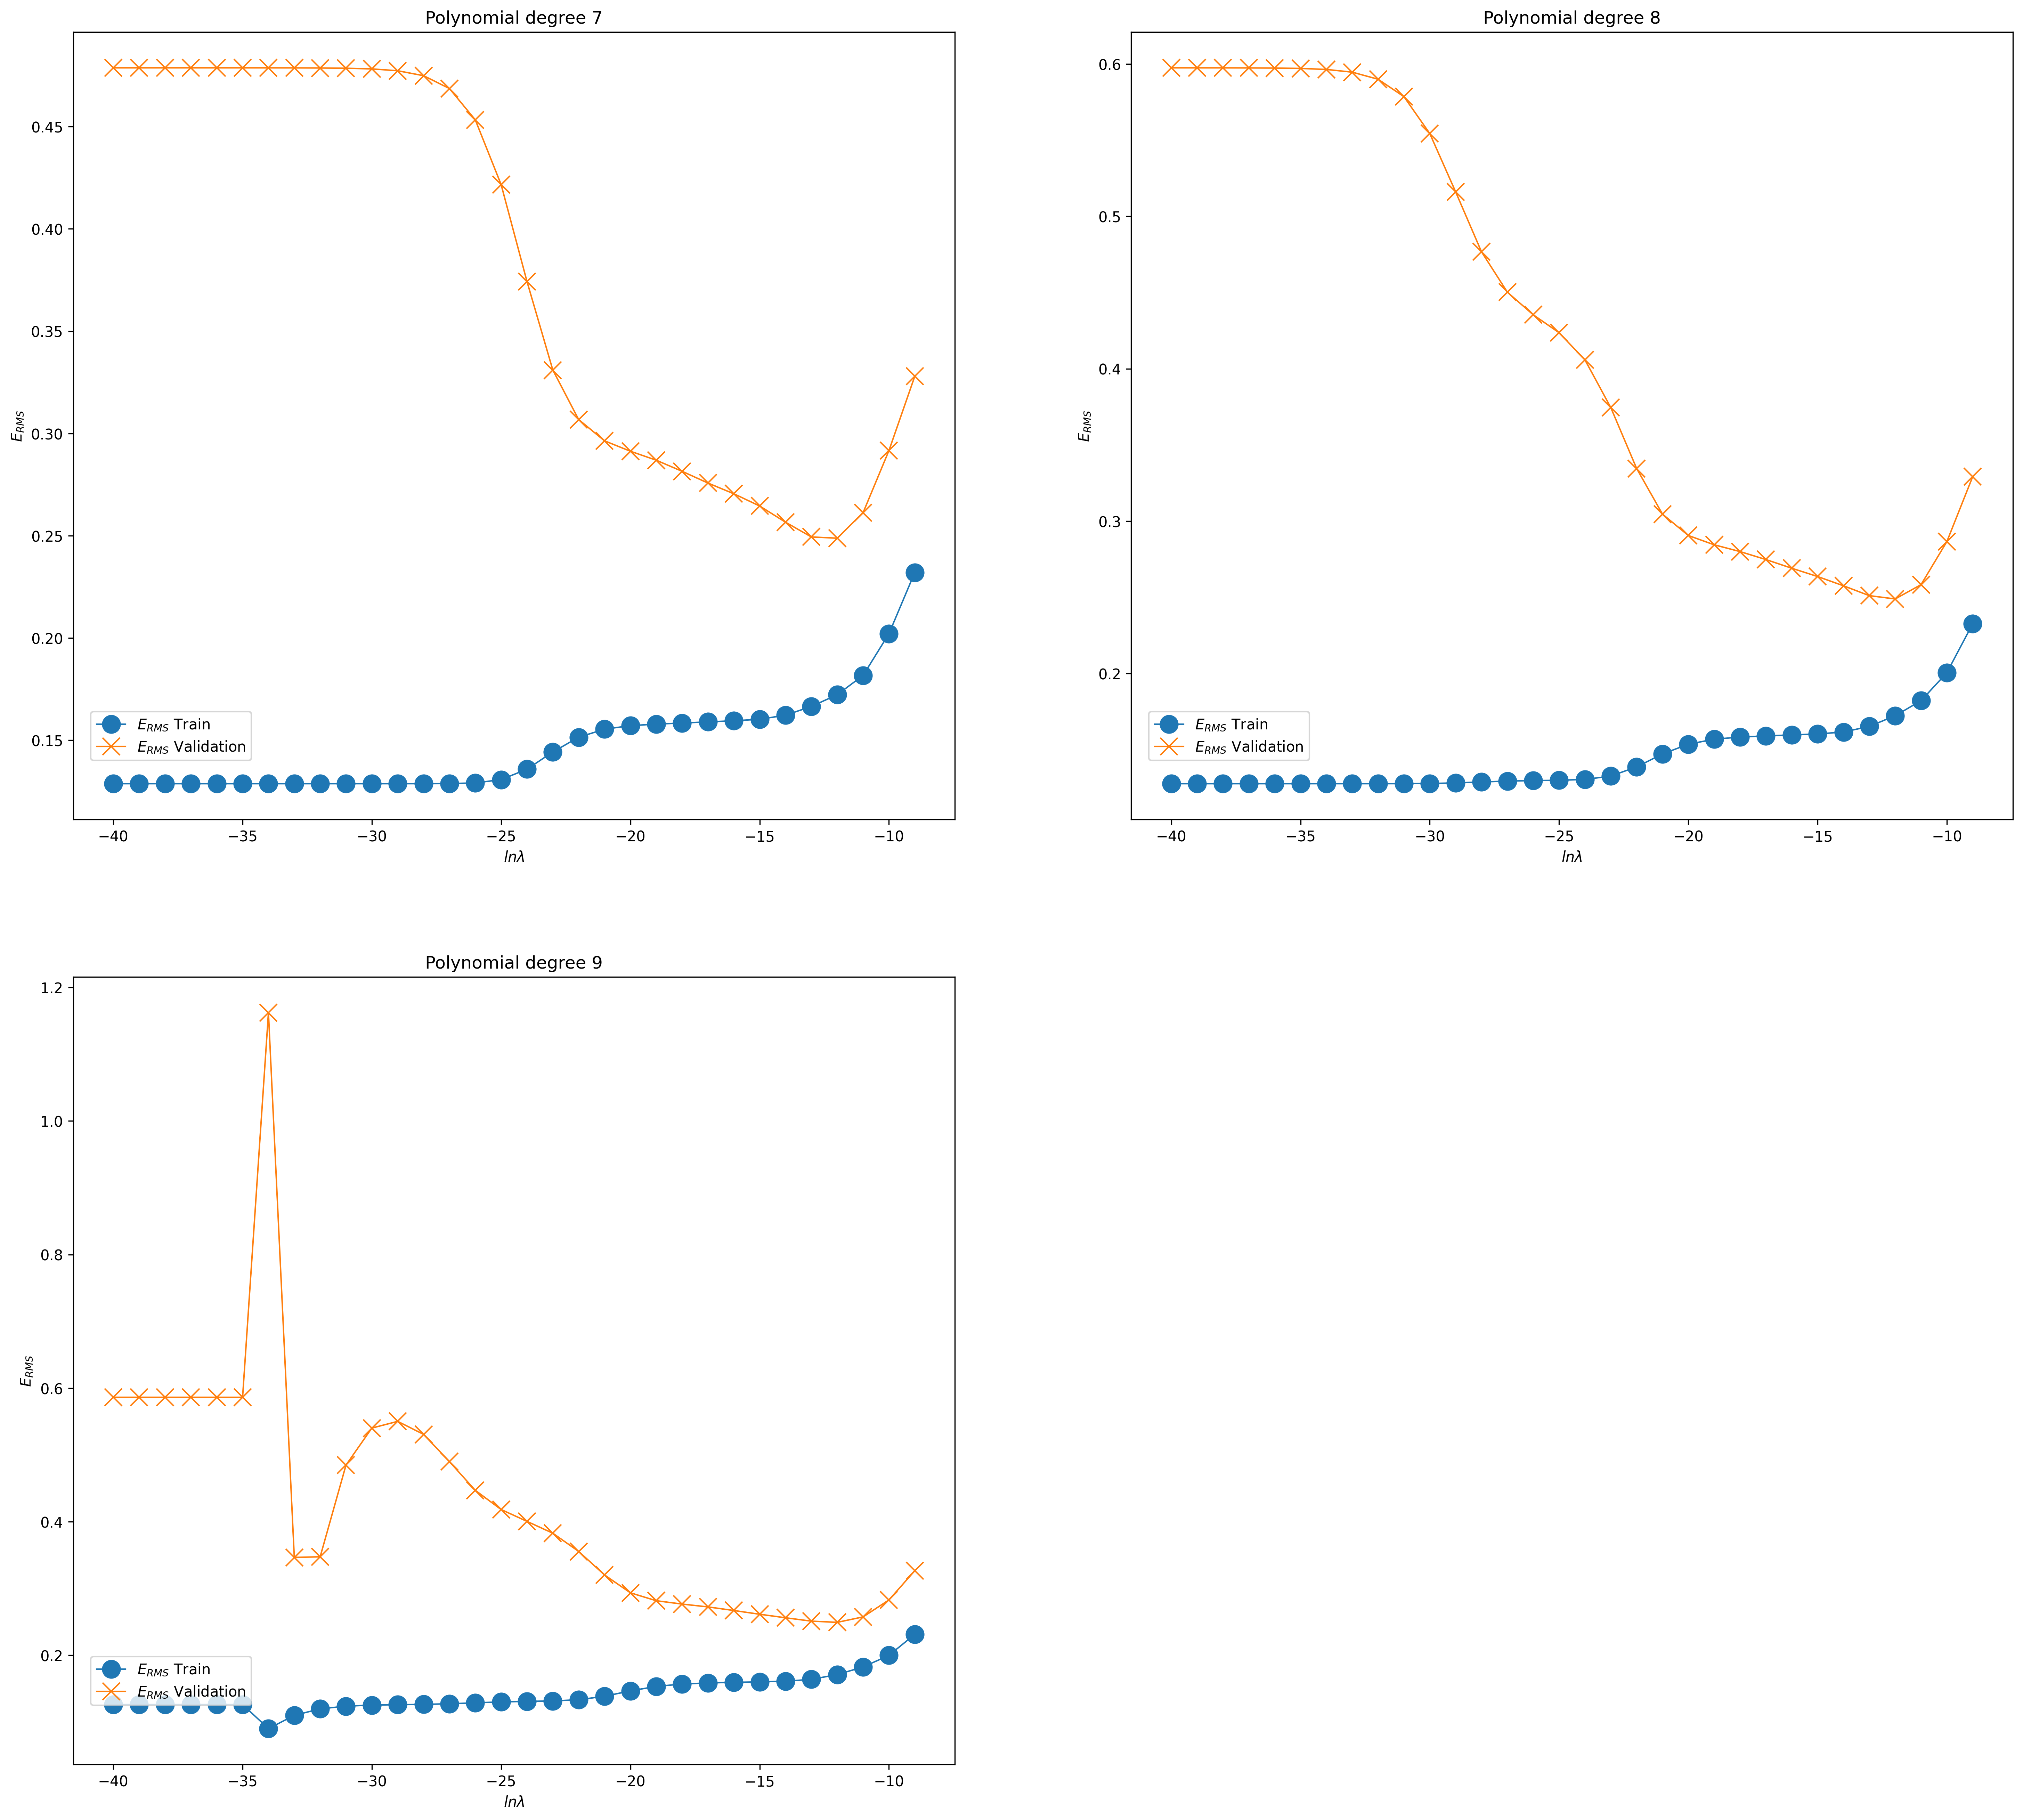

Model selected was a  polynome of degree 7 with lambda = 6.144212e-06
Root mean squared test error: 0.264


In [10]:
log_lamb = range(-40,-8) # regularization values
M = range(7,10) # different polynomial degrees
train = np.zeros((len(log_lamb), len(M)))
val = np.zeros((len(log_lamb), len(M)))

for (i,m) in enumerate(M):
    for (j,l) in enumerate(log_lamb):
        lamb = np.exp(l)
        coeffs = polynomial_fit_reg(x_train, y_train, m,lamb)[::-1]
        train[j,i] = rms_error(x_train,y_train,coeffs)
        val[j,i] = rms_error(x_val,y_val,coeffs)
    
plt.figure(figsize = (24,22), dpi = 300)
for (i,m) in enumerate(M):
    plt.subplot(2, 2, i + 1)
    plt.plot(log_lamb,train[:,i],linewidth = 1.0,marker = 'o',markersize = 12,label = r'$E_{RMS}$ Train')
    plt.plot(log_lamb,val[:,i],linewidth = 1.0,marker = 'x',markersize = 12,label = r'$E_{RMS}$ Validation')
    plt.legend(loc = (0.02, 0.075))
    plt.xlabel(r'$ln\lambda$')
    plt.ylabel(r'$E_{RMS}$')
    plt.title("Polynomial degree %d" %m)
plt.show()

# Model selection
best_M_reg = np.unravel_index(val.argmin(), val.shape)
W = polynomial_fit_reg(x_train, y_train, M[best_M_reg[1]], np.exp(log_lamb[best_M_reg[0]]))[::-1]
test_error = rms_error(x_test,y_test,W)
print("Model selected was a  polynome of degree %d with lambda = %e" %(M[best_M_reg[1]], np.exp(log_lamb[best_M_reg[0]])))
print("Root mean squared test error: %.3f" %test_error)

## Summary 

That is all folks. In this tutorial, we presented a gentle introduction to model selection, over-fitting and regularization. We saw how to design our experiment by splitting our dataset into a development set (train + validation sets) and a test set. This method is commonly employed when we have very large datasets that may take days to train. For smaller datasets, a procedure called [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#:~:text=Cross%2Dvalidation%2C%20sometimes%20called%20rotation,to%20an%20independent%20data%20set.) is often employed. We also saw that polynomials with high degrees tended to overfit to the data and by adding a regularization term to the cost function, over-fitting can be potentially mitigated. Another way to avoid over-fitting is by collecting more data (see activity suggestions), which is not always feasible. 

The concepts explained in this tutorial are valid not just for polynomial fits, but also across diffrent machine learning models like neural networks and support vector machines.



## Activity suggestions

- Use more data for training your model;
- Change the input signal;
- Change the noise intensity;